###  Import Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

# Read Data

In [85]:
df=pd.read_csv("final_scout_not_dummy.csv")

In [86]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [89]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [90]:
df2 = df.copy()

## Feature Engineering

In [7]:
df.select_dtypes('object').columns ## https://github.com/MEnesAkpinar/ML_AutoScout_Project/blob/main/EN_modeling_auto_scout_student_solution.ipynb

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [8]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [9]:
df[df.make_model=="Audi A2"] ## Audi A2 nin önce indexsini bulduk 

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [10]:
df.drop(index=[2614], inplace =True)

In [11]:
df.shape

(15914, 23)

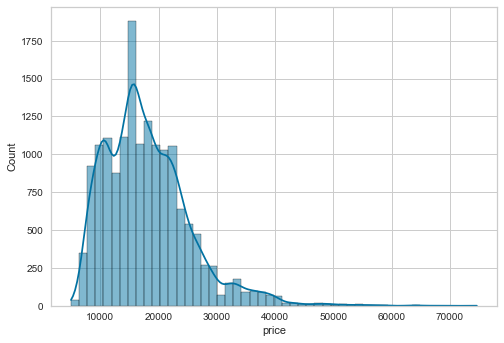

In [12]:
sns.histplot(df.price, bins=50, kde=True);

In [13]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


## multicollinearity control

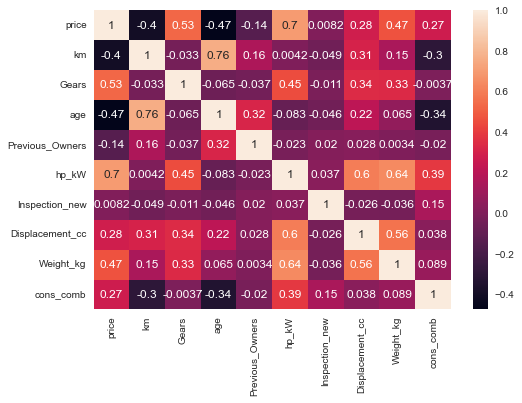

In [14]:
sns.heatmap(df_numeric.corr(), annot =True);

C:\Users\joujo\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


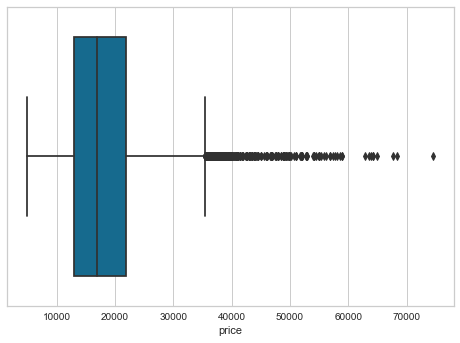

In [15]:
sns.boxplot(df.price);

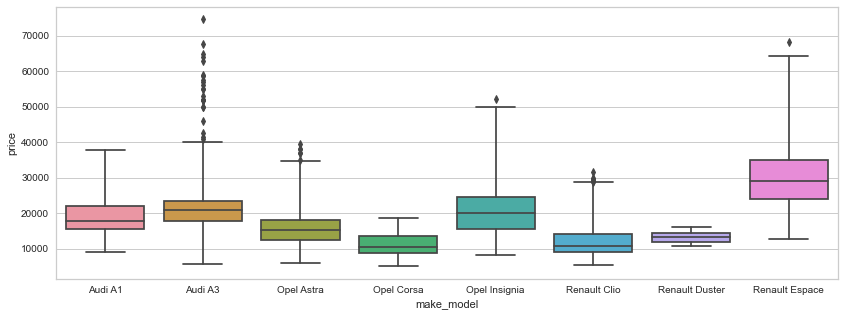

In [16]:
plt.figure(figsize=(14,5))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()  ## whis 3 aldik cunku gercekten outlier mi bunu belirlemek icin wishkerlari genis aldik.( default degeri 1.5 )

## Get dummies  (object ogeleri ikili kodlama yaparak sayisal ogelere dönüstürüyor)

In [17]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_")) #virgulle ayrilmis featurlari tek tek sütün olarak yadiriyoruz, 
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_")) # virgülden ayir ve basina cc ekle diyoruz
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [18]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [19]:
df = pd.get_dummies(df, drop_first =True)

In [20]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,...,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,...,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,...,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,...,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,...,1,0,0,0,0,0,0,0,1,0


In [21]:
df.shape

(15914, 133)

In [22]:
corr_by_price = df.corr()["price"].sort_values()[:-1] ##-1 e kadar yazma sebebimiz preisin kendisini ile tekrar kolerasyona bakmasin diye 
corr_by_price

age                         -0.473478
Gearing_Type_Manual         -0.431798
km                          -0.399301
make_model_Opel Corsa       -0.379363
Type_Used                   -0.366300
                               ...   
make_model_Renault Espace    0.420920
ss_LED Headlights            0.436273
Weight_kg                    0.468564
Gears                        0.530315
hp_kW                        0.696465
Name: price, Length: 132, dtype: float64

## 2. Data Pre-Processing

In [23]:
df.head() ## datamizda featur katsayilari cok farkli bunlar scale edilmeli,standart hale getirilmeli 

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,...,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,...,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,...,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,...,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,...,1,0,0,0,0,0,0,0,1,0


In [24]:
X= df.drop(columns="price")
y= df.price

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(12731, 132)

In [27]:
X_test.shape

(3183, 132)

## Implement Linear Regression

In [28]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)  ## hata metriklerini karsilastirabilmek icin kullaniyoruz

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # modelimizin adi lm 
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
pd.options.display.float_format = '{:.3f}'.format #daha rahat okunabilsin diye noktadan sonra  3 rakam görünsün istiyoruz

In [31]:
train_val(lm, X_train, y_train, X_test, y_test) # overfitting var ya da yok olayina cros validation dan sonra karar veriyoruz. 
                                                # yani verinin birkac yerinden test yapmamiz gerekiyor.

,train,test
R2,0.891,0.886
mae,1700.029,1728.915
mse,5935067.388,6267140.944
rmse,2436.199,2503.426


### Adjusted R2 Score

In [32]:
def adj_r2(y_test, y_pred, df):    
    r2 = r2_score(y_test, y_pred) 
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2
## data ya cok sayida feature eklendi ancak gözlem eklenmedi ise adjusted R2 ye bakmak gerekir. r2 ile düzelmilmis R2 arasinda cok fark 
## var ise model de hata oldugu anlamina gelir

In [33]:
y_pred = lm.predict(X_test)

In [34]:
adj_r2(y_test, y_pred, df)

0.8846640715800353

### Cross Validate

In [35]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [36]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.205,0.016,0.869,0.893,-1796.920,-1684.021,-7411680.847,-5785085.584,-2722.440,-2405.220
1,0.081,0.016,0.902,0.889,-1693.786,-1703.932,-5444805.727,-5998631.235,-2333.411,-2449.210
2,0.126,0.007,0.881,0.892,-1774.840,-1691.681,-6816392.331,-5848345.621,-2610.822,-2418.335
3,0.112,0.016,0.899,0.890,-1651.155,-1709.194,-5183104.431,-6027224.207,-2276.643,-2455.041
4,0.118,0.000,0.871,0.893,-1762.633,-1695.891,-6547950.549,-5879632.391,-2558.896,-2424.795
5,0.094,0.000,0.885,0.891,-1680.670,-1707.824,-5587261.975,-5983669.271,-2363.739,-2446.154
6,0.119,0.000,0.896,0.890,-1677.273,-1707.885,-4955589.641,-6051837.320,-2226.115,-2460.048
7,0.120,0.008,0.891,0.891,-1759.619,-1688.670,-7073807.262,-5823358.607,-2659.663,-2413.164
8,0.136,0.000,0.892,0.890,-1749.306,-1697.121,-6513244.535,-5883601.080,-2552.106,-2425.614
9,0.136,0.016,0.886,0.891,-1679.341,-1704.871,-5713270.933,-5972209.345,-2390.245,-2443.810


In [37]:
pd.DataFrame(scores).iloc[:, 2:].mean()## cv ile buldugumuz hata metriklerinin ortalamalarini aliyoruz ve buraya göre overfitting yoktur diyebiliriz

test_r2                                    0.887
train_r2                                   0.891
test_neg_mean_absolute_error           -1722.555
train_neg_mean_absolute_error          -1699.109
test_neg_mean_squared_error         -6124710.823
train_neg_mean_squared_error        -5925359.466
test_neg_root_mean_squared_error       -2469.408
train_neg_root_mean_squared_error      -2434.139
dtype: float64

In [38]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.891,0.886
mae,1700.029,1728.915
mse,5935067.388,6267140.944
rmse,2436.199,2503.426


In [39]:
2503/df.price.mean()

0.13887238926767506

### Prediction Error

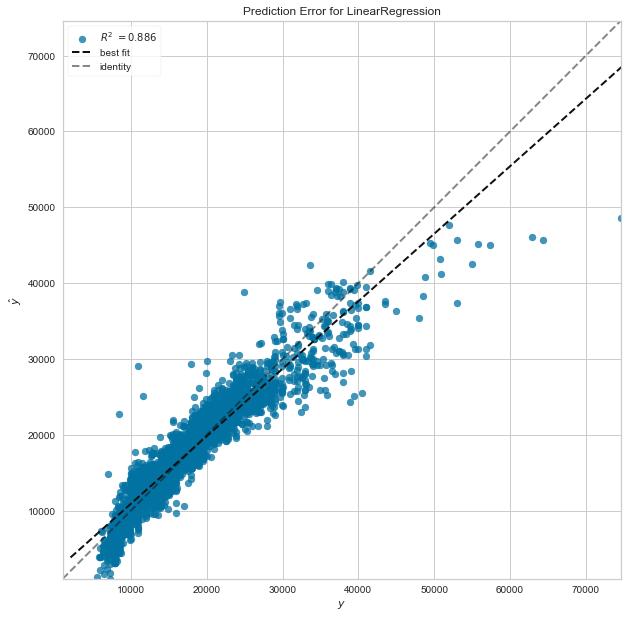

In [40]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  ## iki cizgi arasindaki aci modelin basarisini gösteriyor.Burada 35 binden sonrasi icin model 
visualizer.show();                ## iyi calismiyor diyebiiliri, cunku datamiz da yeterli veri yok bununla ilgili 

### Dropping observations from the dataset that worsen my predictions

#### test size = 0.2

In [41]:
df3 = df[~(df.price>35000)]## fiyati 35.000 altinda olanlari almak istiyoruz, cunku model de 35.000 uzerinde cok fazla gözlem yok 
df3.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,...,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,...,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,...,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,...,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,...,1,0,0,0,0,0,0,0,1,0


In [42]:
## yeni modelimizi kuralim
X = df3.drop(columns = "price")
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

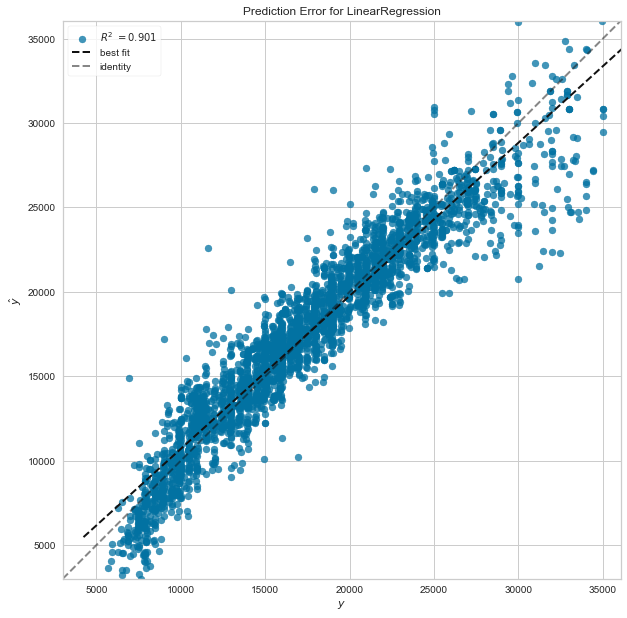

In [44]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

In [45]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.900,0.901
mae,1418.635,1400.504
mse,3794922.864,3664591.900
rmse,1948.056,1914.312


In [46]:
2503/df3.price.mean()

0.1447806462237838

In [47]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [48]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

NameError: name 'comp_sample' is not defined

In [52]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9921.954
make_model_Renault Clio,-5500.114
make_model_Opel Corsa,-5459.926
make_model_Opel Astra,-3565.699
Type_Employee's car,-2093.149
...,...
make_model_Audi A3,1375.643
Paint_Type_Perl effect,1457.905
Gearing_Type_Semi-automatic,1902.514
body_type_Off-Road,2046.349


### Scaling 


In [53]:
scaler = MinMaxScaler()  ## burada neden MinMaxscalar kullaniyoruz: sütunlarimizin cogu sifir ve 1 den olusuyor,minmax de bizim
scaler.fit(X_train)      ## degerlerimizi 0 ile 1 arasina sikistiriyor bu nedenle datamizla uyumlu olsun diye MinMaxScaler yapiyoruz
                         ## scaling islemki sadece train datasina uygulariz. X_test kismina da transform yapiyoruz
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge

### Random state=42

In [54]:
from sklearn.linear_model import Ridge, RidgeCV

In [55]:
ridge_model = Ridge(random_state=42) ## Modeli kurduk 

In [56]:
ridge_model.fit(X_train_scaled, y_train) # Modeli scaled edilmis X_train ve y_train  ile fit ediyoruz

Ridge(random_state=42)

In [57]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1418.789,1399.763
mse,3796678.095,3662786.099
rmse,1948.507,1913.841


### Finding best alpha for Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV ## GridSearch icerisinde cv oldugu icin sadece GridSearch yapiyoruz

In [49]:
alpha_space = np.linspace(0.01, 100, 100) ## 100 adet esit aralikli deger olusturuyoruz.
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [50]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1) # n_jobs=-1 gridSearch yaparken bilgisayardaki agirligi bizim islemimize ver diyor

In [58]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [59]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [60]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02, random_state=42)

In [61]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097,0.017,0.002,0.005,0.010,{'alpha': 0.01},-1980.637,-1983.578,-2063.026,-1938.249,-1953.814,-1932.014,-1988.311,-1978.189,-2034.167,-1928.672,-1978.066,41.523,2
1,0.100,0.008,0.000,0.000,1.020,{'alpha': 1.02},-1981.727,-1978.237,-2062.639,-1938.756,-1948.486,-1935.378,-1992.006,-1976.204,-2035.671,-1927.093,-1977.620,41.858,1
2,0.094,0.010,0.000,0.000,2.030,{'alpha': 2.03},-1983.073,-1975.177,-2062.941,-1939.955,-1945.952,-1938.487,-1995.993,-1976.062,-2037.691,-1926.951,-1978.228,42.167,3
3,0.095,0.005,0.003,0.006,3.040,{'alpha': 3.04},-1984.647,-1973.347,-2063.654,-1941.568,-1944.854,-1941.401,-2000.055,-1976.892,-2039.930,-1927.667,-1979.401,42.432,4
4,0.103,0.012,0.000,0.000,4.050,{'alpha': 4.05},-1986.404,-1972.315,-2064.650,-1943.445,-1944.620,-1944.167,-2004.099,-1978.302,-2042.272,-1928.928,-1980.920,42.660,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.105,0.006,0.002,0.003,95.960,{'alpha': 95.96000000000001},-2155.080,-2090.930,-2191.978,-2112.557,-2075.496,-2084.302,-2198.259,-2155.644,-2203.955,-2085.333,-2135.353,48.841,96
96,0.101,0.008,0.000,0.000,96.970,{'alpha': 96.97000000000001},-2156.507,-2092.168,-2193.085,-2113.966,-2076.661,-2085.402,-2199.630,-2157.111,-2205.263,-2086.566,-2136.636,48.886,97
97,0.113,0.025,0.004,0.005,97.980,{'alpha': 97.98},-2157.928,-2093.403,-2194.189,-2115.370,-2077.821,-2086.497,-2200.993,-2158.571,-2206.566,-2087.794,-2137.913,48.931,98
98,0.172,0.022,0.002,0.004,98.990,{'alpha': 98.99000000000001},-2159.342,-2094.634,-2195.289,-2116.769,-2078.977,-2087.588,-2202.350,-2160.025,-2207.863,-2089.016,-2139.185,48.976,99


In [62]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1418.795,1399.757
mse,3796741.194,3662792.595
rmse,1948.523,1913.842


In [63]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [64]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10629.403
make_model_Renault Duster,-8805.406
make_model_Opel Corsa,-5491.997
make_model_Renault Clio,-5477.417
age,-4427.746
...,...
body_type_Off-Road,1403.806
Gearing_Type_Semi-automatic,1898.283
Gears,2042.925
make_model_Renault Espace,3024.083


## Lasso 

In [65]:
from sklearn.linear_model import Lasso, LassoCV

In [66]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [67]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.723,1396.817
mse,3808435.223,3647222.237
rmse,1951.521,1909.770


## En iyi lasso parametresini bulalim

In [69]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [70]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [71]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.779,1396.803
mse,3808860.485,3647145.516
rmse,1951.630,1909.750


In [72]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [73]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10618.221
make_model_Renault Duster,-7682.528
make_model_Opel Corsa,-5466.866
make_model_Renault Clio,-5417.008
age,-4443.859
...,...
make_model_Audi A3,1353.587
Gearing_Type_Semi-automatic,1809.588
Gears,1991.516
make_model_Renault Espace,2974.978


## Feature Importance

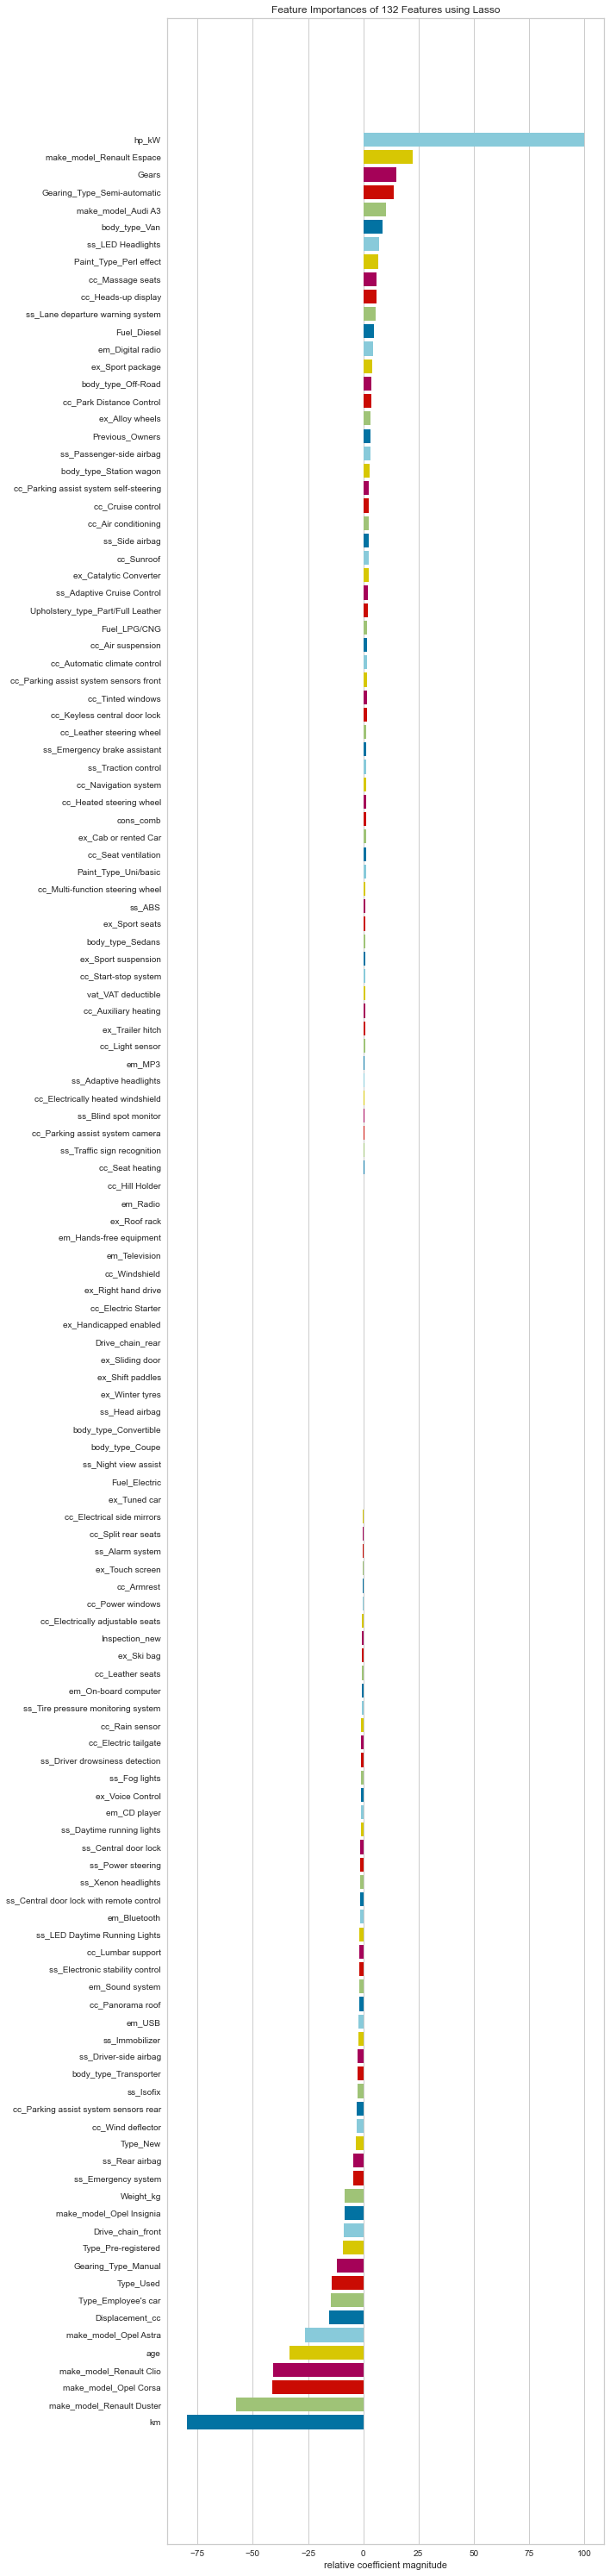

In [74]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 15914
Columns: 133 entries, price to Drive_chain_rear
dtypes: float64(8), int64(96), uint8(29)
memory usage: 13.7 MB


In [91]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "price"]]

In [92]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [93]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [94]:
df_new.drop(index=[2614], inplace =True)

C:\Users\joujo\AppData\Local\Temp\ipykernel_1908\2457072396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(index=[2614], inplace =True)


In [95]:
df_new = df_new[~(df_new.price>35000)]

In [96]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0


In [97]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [102]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [103]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [104]:
lasso_final_model.best_score_

-2239.588352950935

In [105]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [106]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [107]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.901,1400.504,1914.312
ridge_m,0.901,1399.757,1913.842
lasso_m,0.901,1396.803,1909.750
final_m,0.877,1553.998,2132.539


Sonuc: Degerleri karsilastirdigimiz da final modelimizi lasso ya göre yapmamizin mantikli olacagini söyleyebiliriz

## The End